In [1]:
import numpy as np
import pandas as pd
import pickle

In [2]:
file = open('working/model','rb')
model = pickle.load(file)
file.close()

In [4]:
train = pd.read_csv('data/raw/train.csv')
test = pd.read_csv('data/raw/test.csv')

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, log_loss
import lightgbm as lgb

plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

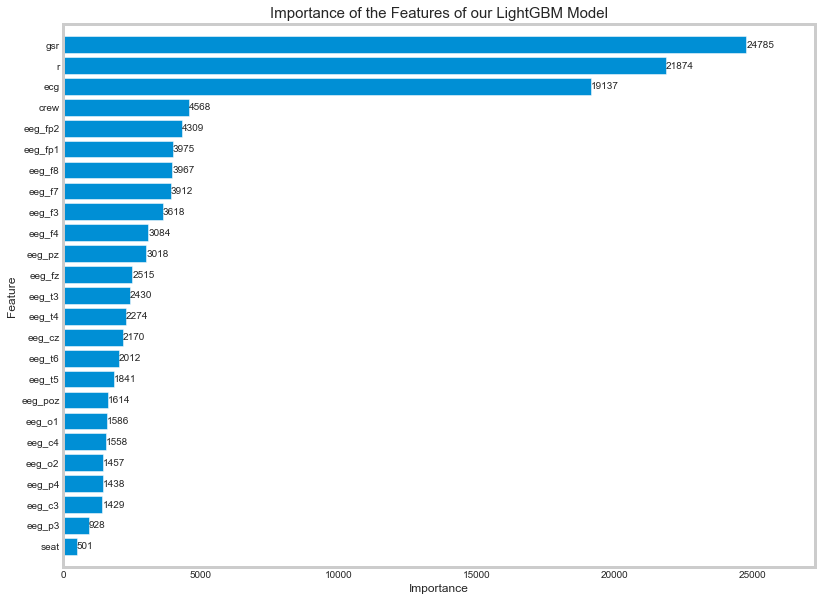

In [6]:
fig, ax = plt.subplots(figsize=(12,10))
lgb.plot_importance(model, height=0.8, ax=ax)
ax.grid(False)
plt.ylabel('Feature', size=12)
plt.xlabel('Importance', size=12)
plt.title("Importance of the Features of our LightGBM Model", fontsize=15)
plt.show()

## Submission

In [8]:
features_n = ["eeg_fp1", "eeg_f7", "eeg_f8", "eeg_t4", "eeg_t6", "eeg_t5", 
              "eeg_t3", "eeg_fp2", "eeg_o1", "eeg_p3", "eeg_pz", "eeg_f3", 
              "eeg_fz", "eeg_f4", "eeg_c4", "eeg_p4", "eeg_poz", "eeg_c3", 
              "eeg_cz", "eeg_o2", "ecg", "r", "gsr"]

train['pilot'] = 100 * train['seat'] * train['crew']
test['pilot'] = 100 * test['seat'] + test['crew']

In [9]:
train, val = train_test_split(train, test_size=0.2, random_state=0)

In [10]:
features = ['crew', 'seat'] + features_n

In [15]:
# predictions = model.predict(test[features], num_iteration=model.best_iteration)
# reduce data size
test.select_dtypes(['float64'])

,time,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,eeg_fp2,eeg_o1,...,eeg_f4,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr
0,0.000000,17.899500,6.127830,0.994807,-28.206200,-47.695499,-187.080002,-33.183498,-4.220780,8.178160,...,-7.044480,-14.405100,-4.033840,-0.393799,31.838100,17.075600,-8.137350,-7323.120117,643.177002,594.778992
1,0.000000,45.883202,94.749001,23.290800,1.392000,2.060940,-5.145290,6.395940,33.420101,-295.013000,...,19.887501,-215.179001,2.118320,7.340940,9.667850,1169.239990,-0.024414,-3335.080078,826.724976,136.235001
2,0.003906,33.120098,28.356501,-7.239220,-7.690860,-25.833799,-107.236000,12.845200,1.215280,13.317000,...,-7.642560,-10.363600,10.950500,6.513360,36.018600,24.356600,0.956158,-7323.120117,643.177002,594.778992
3,0.003906,43.280102,95.887001,18.702299,-1.432890,-4.232600,-8.021180,7.427430,27.345699,-310.165009,...,13.826600,-214.223007,-4.913540,3.504520,3.878110,1159.400024,-0.047607,-3335.080078,826.724976,136.235001
4,0.007812,7.929110,3.460380,-10.860800,-26.366699,-25.894699,37.007900,-50.334202,-11.676400,-1.143860,...,2.045450,-20.788799,-3.614180,-7.539830,3.083970,13.647900,1.473720,-7323.120117,643.177002,594.778992
5,0.007812,30.535999,87.867699,0.347961,-20.963200,-17.012100,-23.049299,-4.598790,11.384100,-323.565002,...,-0.285706,-232.798996,-19.776699,-11.119200,-10.802500,1156.390015,0.037964,-3335.080078,826.724976,136.235001
6,0.011719,17.369301,13.193200,22.994699,28.896299,-65.690102,29.625099,-19.750401,2.204260,15.056100,...,36.466599,21.150499,36.458698,13.711900,21.660900,33.605099,24.467300,-7323.120117,643.177002,594.778992
7,0.011719,33.028599,87.419701,16.837299,-7.629910,-17.005199,-23.483999,-6.408690,20.339001,-332.373993,...,11.977500,-231.951996,-14.173200,-11.580700,-7.777650,1153.839966,0.023804,-3335.080078,826.724976,136.235001
8,0.015625,14.567900,12.500000,19.732599,-3.016180,5.862700,53.377399,-17.998600,7.475400,16.549200,...,17.775700,1.368440,17.807800,6.195470,15.472800,23.945000,14.485700,-7323.120117,643.177002,594.778992
9,0.015625,37.561600,87.320396,24.180799,1.932710,-9.427980,-16.876200,-3.198970,24.277100,-339.220001,...,15.059600,-229.264999,-7.315490,-7.015810,-4.308720,1146.380005,0.023804,-3335.080078,826.724976,136.235001


## Submission

In [ ]:
#predict = model.predict[test[features], num_iteration=model.best_iteration]
